In [1]:
import pandas as pd

In [6]:
# Razlikujemo dva glavna tipa u pandasu - sereies i DataFrame
x = pd.Series([1,2,3,4,5], index = ['a', 'b', 'c', 'd', 'e'])
x

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [5]:
y = pd.Series([5,6,7,8])
y

0    5
1    6
2    7
3    8
dtype: int64

In [7]:
x + y # Ne radi jer prvi series ima slova za indekse

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
0   NaN
1   NaN
2   NaN
3   NaN
dtype: float64

In [9]:
df = pd.DataFrame([['pera','peric',23],['ana','anic',26]], columns = ['ime', 'prezime', 'godina'])
df

,ime,prezime,godina
0,pera,peric,23
1,ana,anic,26


In [10]:
df['ime']

0    pera
1     ana
Name: ime, dtype: object

In [11]:
df[['ime']]

,ime
0,pera
1,ana


In [12]:
df['ime'][0]

'pera'

In [14]:
df.iloc[0,1] # Posmatra df kao obicnu matricu i omogucava takvo indeksiranje

'peric'

In [15]:
df.iloc[0:-1]

,ime,prezime,godina
0,pera,peric,23


In [17]:
df['godina'] > 25

0    False
1     True
Name: godina, dtype: bool

In [18]:
df[['godina']] > 25

,godina
0,False
1,True


In [20]:
df.dropna() # brise redove sa nedostajucim vrednostima

,ime,prezime,godina
0,pera,peric,23
1,ana,anic,26


In [21]:
df = pd.read_csv('./../4/iris.csv')

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
df.shape

(150, 5)

In [24]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
df.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [ ]:
df.corr()

In [28]:
y = df['species']

In [29]:
feature_name = df.columns.to_list()[:-1]

In [30]:
X = df[feature_name]

In [31]:
X.shape

(150, 4)

In [32]:
y.shape

(150,)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
X_train.shape

(105, 4)

In [36]:
X_test.shape

(45, 4)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model = DecisionTreeClassifier()

In [39]:
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
y_train_pred = model.predict(X_train)

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_train, y_train_pred)

array([[31,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 37]])

In [43]:
y_test_pred = model.predict(X_test)

In [44]:
confusion_matrix(y_test, y_test_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [45]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [46]:
model.feature_importances_

array([0.01911002, 0.01911002, 0.53816374, 0.42361622])

In [50]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

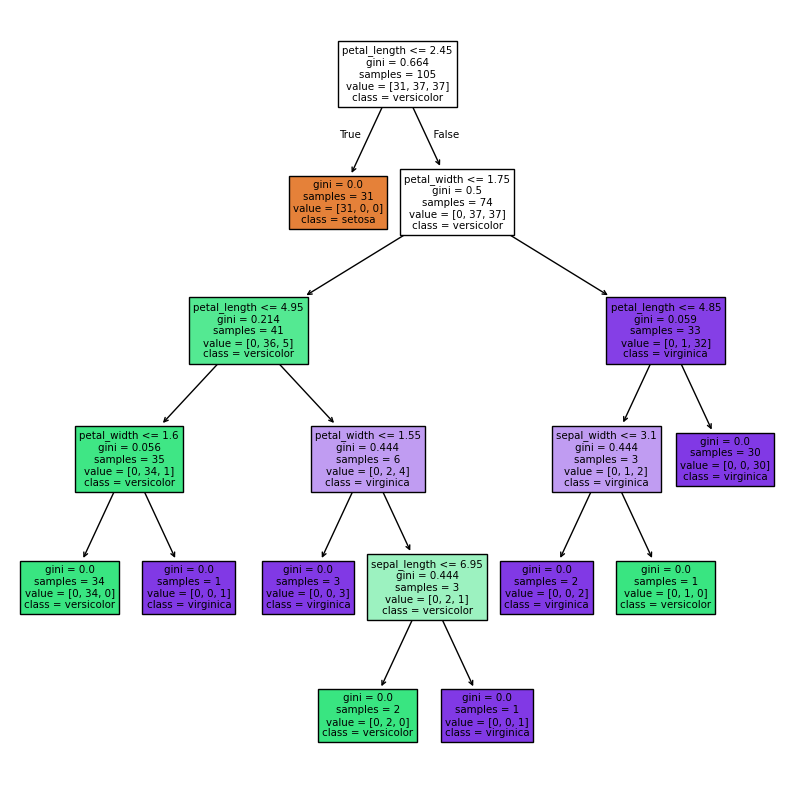

In [57]:
plt.figure(figsize = (10,10))
_ = plot_tree(model, feature_names=feature_name, class_names=model.classes_, filled = True)

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,3,4],
          'min_samples_leaf': [2,3]
         }

In [63]:
model2 = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring = 'accuracy', cv = 5)

In [65]:
model2.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [2, 3]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [66]:
model2.best_estimator_

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [67]:
model2.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}

In [68]:
model2.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}

In [69]:
y2_pred = model2.best_estimator_.predict(X_test)

In [70]:
confusion_matrix(y_test, y2_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [74]:
from sklearn.tree import plot_tree

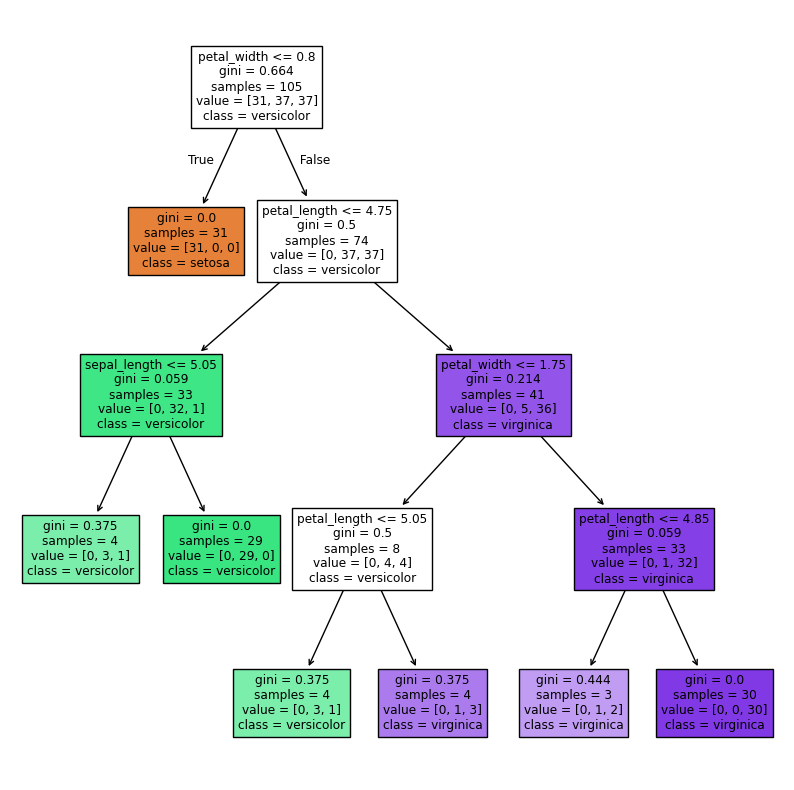

In [76]:
plt.figure(figsize=(10, 10))
_ = plot_tree(model2.best_estimator_, feature_names = feature_name, class_names = model2.classes_, filled = True)

In [77]:
model2.best_estimator_.feature_importances_

array([0.00687218, 0.        , 0.43614341, 0.55698441])

KNN - K Nearest Neighbours, za razlicitko K mozemo dobiti razlicite rezultate